In [4]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&topics=economy_macro&apikey=HKHE3U0MF6OT06XT'
r = requests.get(url)
data = r.json()

print(data)

{'items': '0', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': []}


In [7]:
# Replace with your own API key
api_key = 'HKHE3U0MF6OT06XT'
base_url = 'https://www.alphavantage.co/query'

# Function to extract economy macro news for the past 3 years
def get_economy_macro_news(api_key):
    url = f'{base_url}?function=NEWS_SENTIMENT&tickers=AAPL&topics=economy_macro&apikey={api_key}'
    
    # Send request to Alpha Vantage API
    r = requests.get(url)
    data = r.json()
    
    # Print full API response for reference
    print("API Response:", data)
    
    # Extract the feed data
    news_data = data.get('feed', [])
    
    if not news_data:
        # If the feed is empty, create a DataFrame with metadata fields
        df = pd.DataFrame({
            'items': [data.get('items', 'N/A')],
            'sentiment_score_definition': [data.get('sentiment_score_definition', 'N/A')],
            'relevance_score_definition': [data.get('relevance_score_definition', 'N/A')]
        })
    else:
        # If there's data, create a DataFrame from the feed
        df = pd.DataFrame(news_data)

    return df

# Call the function and create the DataFrame
news_df = get_economy_macro_news(api_key)

# Print the DataFrame
print(news_df)


API Response: {'items': '0', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': []}
  items                         sentiment_score_definition  \
0     0  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   

                          relevance_score_definition  
0  0 < x <= 1, with a higher score indicating hig...  


In [11]:
# Function to extract economy macro news for multiple tickers
def get_economy_macro_news(api_key, tickers):
    url = f'{base_url}?function=NEWS_SENTIMENT&tickers=AAPL&topics=economy_macro&apikey={api_key}'
    
    # Send request to Alpha Vantage API
    r = requests.get(url)
    data = r.json()
    
    # Extract the feed data
    news_data = data.get('feed', [])
    
    if not news_data:
        # If the feed is empty, create a structured DataFrame with metadata
        structured_data = {
            'Metadata': ['Items', 'Sentiment Score Definition', 'Relevance Score Definition'],
            'Details': [
                data.get('items', 'N/A'),
                data.get('sentiment_score_definition', 'N/A'),
                data.get('relevance_score_definition', 'N/A')
            ]
        }
        df = pd.DataFrame(structured_data)
    else:
        # If there is data in the feed, create a DataFrame from the news data
        df = pd.DataFrame(news_data)
        
        # Select specific columns and add a 'ticker' column to differentiate stocks
        df = df[['title', 'summary', 'url', 'time_published', 'ticker']]

    return df

# List of multiple stocks you want to query
tickers = 'AAPL,GOOGL,AMZN'

# Call the function and create the DataFrame
news_df = get_economy_macro_news(api_key, tickers)

# Print the DataFrame in a structured table format
print(news_df)


                     Metadata  \
0                       Items   
1  Sentiment Score Definition   
2  Relevance Score Definition   

                                             Details  
0                                                  0  
1  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...  
2  0 < x <= 1, with a higher score indicating hig...  


In [12]:
ts = TimeSeries(api_key)
ti = TechIndicators(api_key)
# Get json object with the 30-min interval intraday data and another with  the call's metadata for January, 2014.
data, meta_data = ts.get_intraday('GOOGL', month='2014-01', interval='30min')
#Get json object with the 30-min interval simple moving average (SMA) values and another with  the call's metadata for January, 2014.
data, meta_data = ti.get_sma('GOOGL', month='2014-01', interval='30min')


In [13]:
from datetime import datetime, timedelta

# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily adjusted time series for 'full' dataset
data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')

# Print metadata to check if there are any restrictions or errors
print(meta_data)

# Check the full dataset length
print(f"Total data points retrieved: {len(data)}")

# Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Calculate the date from 5 years ago
five_years_ago = datetime.now() - timedelta(days=5*365)

# Filter the data for the past 5 years
filtered_data = data[data.index >= five_years_ago]

# Check the length of the filtered data
print(f"Total data points after filtering for 5 years: {len(filtered_data)}")

# Display the first two rows of the filtered data

print(filtered_data.head(5))


{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2024-10-01', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}
Total data points retrieved: 6269
Total data points after filtering for 5 years: 1256
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-10-01  428.450  428.480  418.81    420.69  18853029.0
2024-09-30  428.210  430.420  425.37    430.30  16854606.0
2024-09-27  431.520  431.850  427.47    428.02  14896131.0
2024-09-26  435.085  435.300  429.13    431.31  14492044.0
2024-09-25  429.830  433.119  428.57    432.11  13396364.0


In [14]:
 # For the default date string index behavior
ts = TimeSeries(key='YOUR_API_KEY',output_format='pandas', indexing_type='date')
# For the default integer index behavior
ts = TimeSeries(key='YOUR_API_KEY',output_format='pandas', indexing_type='integer')

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high   3. low  4. close   5. volume
date                                                       
2016-07-29    56.39    57.25  55.3800     57.10  10239664.0
2016-07-28    56.19    56.60  56.0137     56.18   5547934.0
2016-07-27    57.12    57.22  55.7200     56.06  11166886.0
2016-07-26    56.17    56.92  56.0900     56.63  12862739.0
2016-07-25    55.00    55.81  54.7600     55.68   7813211.0


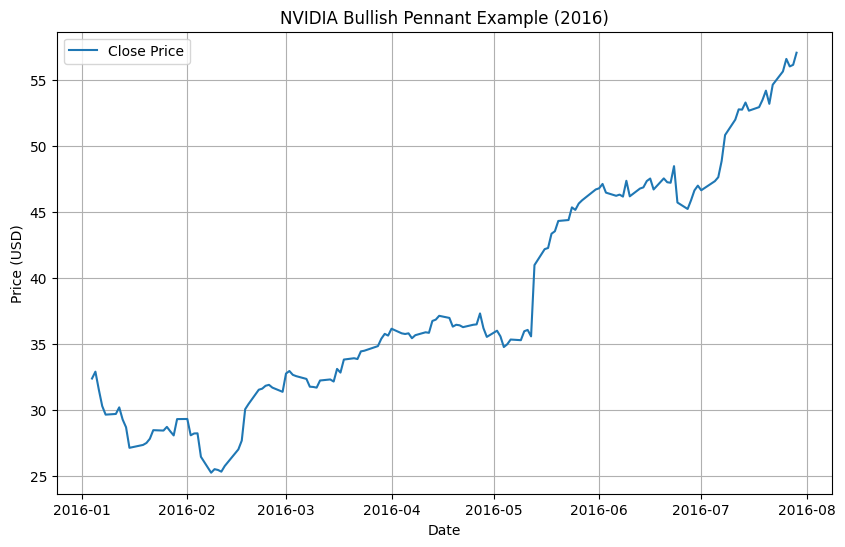

In [39]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='NVDA', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2016-01-01'
end_date = '2016-07-31'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('NVDIA_data.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('NVIDIA Bullish Pennant Example (2016)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-29   319.25   321.15  316.47    317.94  38399532.0
2020-05-28   316.77   323.44  315.63    318.25  33449103.0
2020-05-27   316.14   318.71  313.09    318.11  28236274.0
2020-05-26   323.50   324.24  316.50    316.73  31380454.0
2020-05-22   315.77   319.23  315.35    318.89  20450754.0


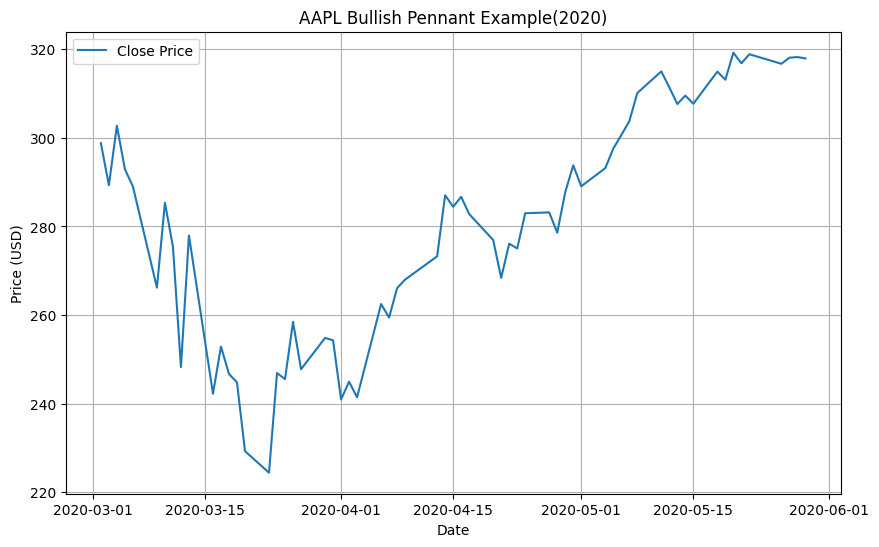

In [40]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2020-03-01'
end_date = '2020-05-31'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('AAPL_data.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('AAPL Bullish Pennant Example(2020)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

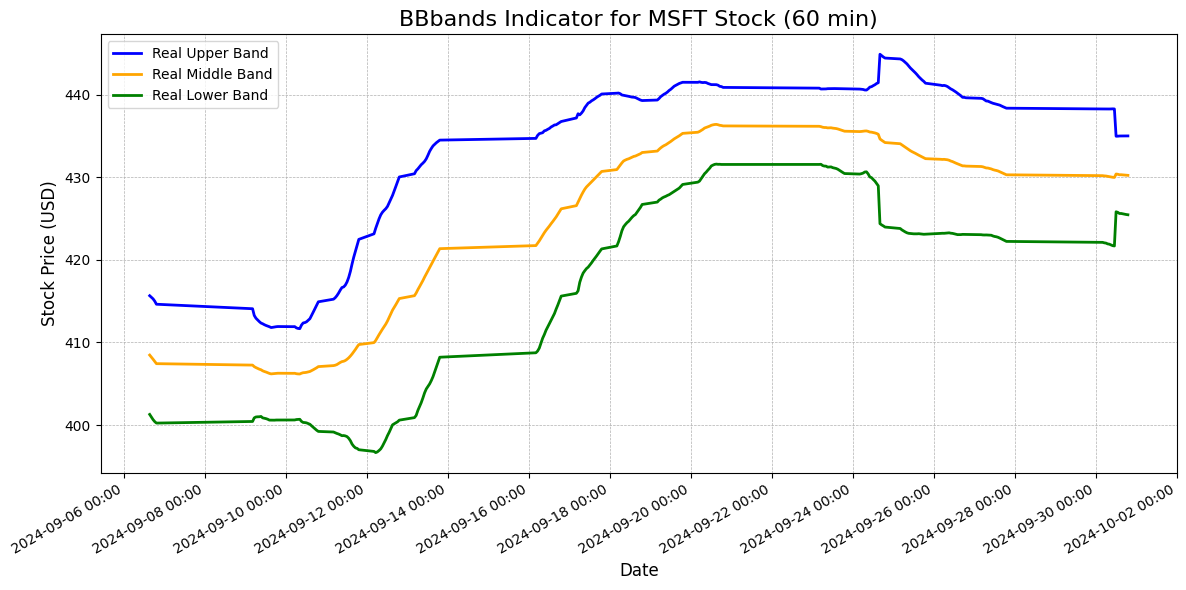

In [ ]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fetching the data from Alpha Vantage
ti = TechIndicators(key='HKHE3U0MF6OT06XT', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)

# Create the figure and axis
plt.figure(figsize=(12, 6), dpi=100)

# Plot the Bollinger Bands with custom styles
plt.plot(data.index, data['Real Upper Band'], label='Real Upper Band', color='blue', linewidth=2)
plt.plot(data.index, data['Real Middle Band'], label='Real Middle Band', color='orange', linewidth=2)
plt.plot(data.index, data['Real Lower Band'], label='Real Lower Band', color='green', linewidth=2)

# Set the title and axis labels
plt.title('BBbands Indicator for MSFT Stock (60 min)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)

# Format the x-axis to display dates every other tick
locator = mdates.DayLocator(interval=2)  # Set interval to 2 for every other tick
plt.gca().xaxis.set_major_locator(locator)

# Format the x-axis to display the datetime in a readable format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Add a grid for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend in the upper left corner
plt.legend(loc='upper left')

# Ensure everything fits well in the plot area
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
import requests
import json

# Set your API key
api_key = "HKHE3U0MF6OT06XT"

# URL to access real GDP data
url = f"https://www.alphavantage.co/query?function=REAL_GDP&apikey={api_key}"

# Make the request and get the response in JSON
response = requests.get(url)
data = response.json()

# Print the data to verify the response
print(json.dumps(data, indent=4))


{
    "name": "Real Gross Domestic Product",
    "interval": "annual",
    "unit": "billions of dollars",
    "data": [
        {
            "date": "2023-01-01",
            "value": "22671.096"
        },
        {
            "date": "2022-01-01",
            "value": "22034.828"
        },
        {
            "date": "2021-01-01",
            "value": "21494.798"
        },
        {
            "date": "2020-01-01",
            "value": "20267.585"
        },
        {
            "date": "2019-01-01",
            "value": "20715.671"
        },
        {
            "date": "2018-01-01",
            "value": "20193.896"
        },
        {
            "date": "2017-01-01",
            "value": "19612.102"
        },
        {
            "date": "2016-01-01",
            "value": "19141.672"
        },
        {
            "date": "2015-01-01",
            "value": "18799.622"
        },
        {
            "date": "2014-01-01",
            "value": "18261.714"
        },


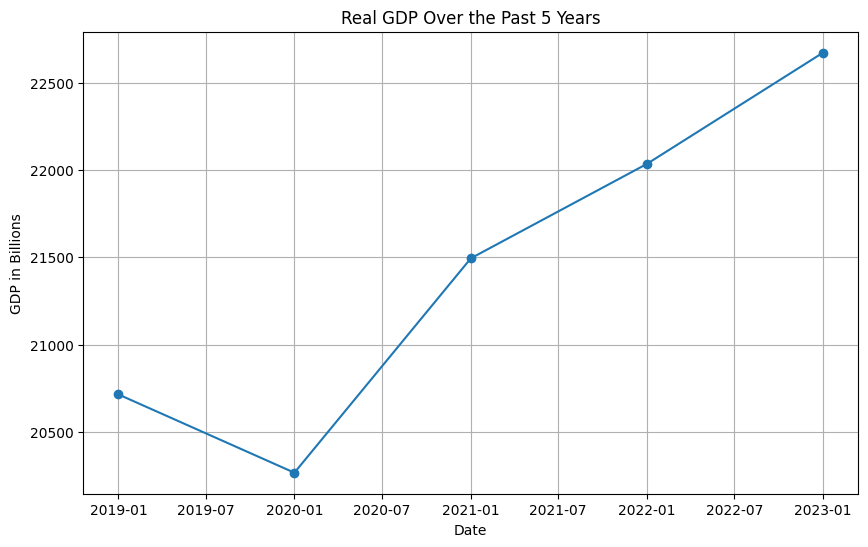

In [ ]:
import pandas as pd

# Convert the data into a pandas DataFrame
gdp_data = pd.DataFrame(data['data'])

# Convert the 'date' column to datetime format and 'value' to numeric
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'])

# Filter the data for the past five years
five_years_ago = datetime.now().year - 5
gdp_data_filtered = gdp_data[gdp_data['date'].dt.year >= five_years_ago]

# Plot the real GDP data
plt.figure(figsize=(10, 6))
plt.plot(gdp_data_filtered['date'], gdp_data_filtered['value'], marker='o')
plt.title('Real GDP Over the Past 5 Years')
plt.xlabel('Date')
plt.ylabel('GDP in Billions')
plt.grid(True)
plt.show()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-03-31   501.25   542.96  497.00    524.00  17771485.0
2020-03-30   510.26   516.65  491.23    502.13  11998067.0
2020-03-27   505.00   525.80  494.03    514.36  14377408.0
2020-03-26   547.39   560.00  512.25    528.16  17422082.0
2020-03-25   545.25   557.00  511.11    539.25  21222745.0


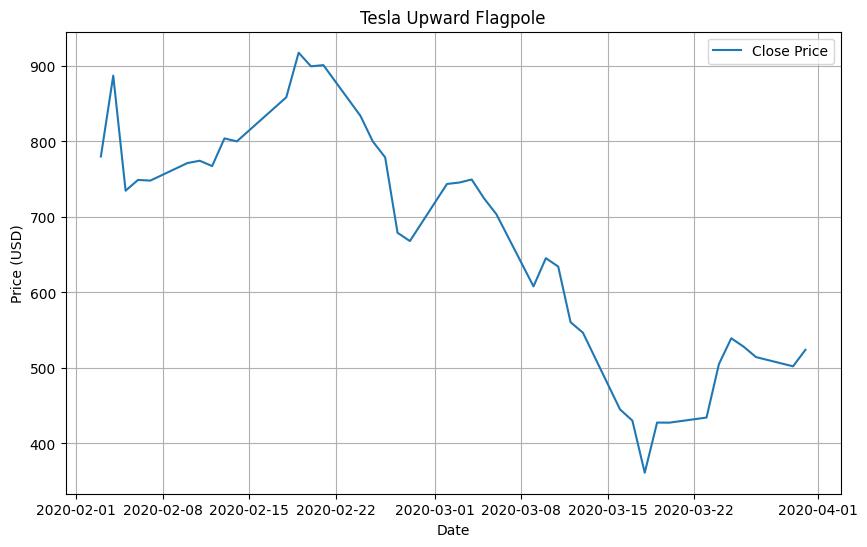

In [60]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2020-02-01'
end_date = '2020-03-31'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('TSLA_flag_data.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Tesla Upward Flagpole')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2008-03-31    38.18    40.00   37.78     37.91  37031600.0
2008-03-28    38.80    39.15   37.98     38.07  38462100.0
2008-03-27    40.01    40.38   38.61     38.64  42795300.0
2008-03-26    40.23    40.45   39.00     39.84  51047100.0
2008-03-25    41.65    42.25   40.70     40.97  52389000.0


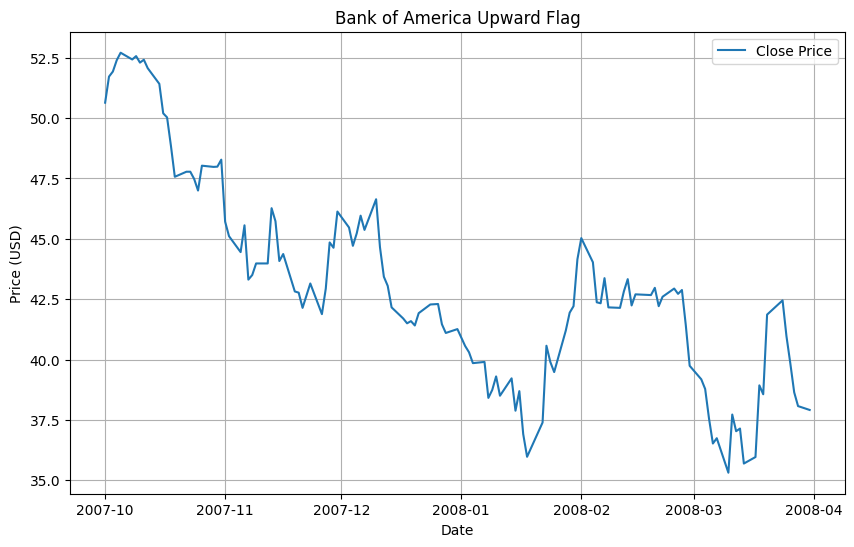

In [57]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='BAC', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2007-10-01'
end_date = '2008-03-31'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('BAC_flag_data.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Bank of America Upward Flag')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2019-03-29   118.07   118.32  116.96    117.94  25399752.0
2019-03-28   117.44   117.58  116.13    116.93  18334755.0
2019-03-27   117.88   118.21  115.52    116.77  22733427.0
2019-03-26   118.62   118.71  116.85    117.91  26097665.0
2019-03-25   116.56   118.01  116.32    117.66  27067117.0


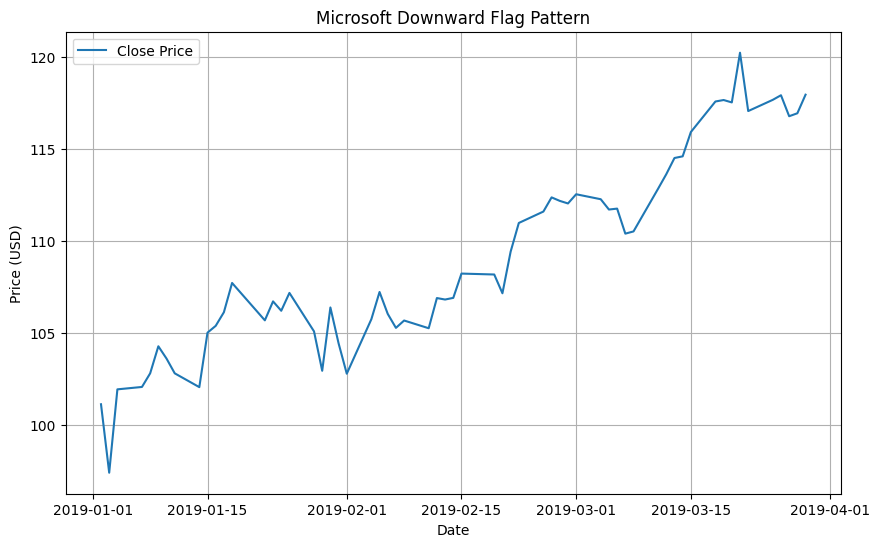

In [62]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2019-01-01'
end_date = '2019-03-31'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Microsoft Downward Flag Pattern')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [1]:
import pandas as pd
import yfinance as yf

# Get S&P 500 tickers from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(url)[0]
tickers = table['Symbol'].tolist()

# Define time period
start_date = '2023-01-01'
end_date = '2023-10-14'

# Download stock data
data = yf.download(tickers, start=start_date, end=end_date)

# Get closing prices
closing_prices = data['Adj Close']

# Calculate returns
returns = closing_prices.pct_change()

# Filter for stocks with positive returns
positive_returns = returns.mean()[returns.mean() > 0].sort_values(ascending=False)

# Select top 50 performing stocks
top_50_stocks = positive_returns.head(50)

print("Top 50 S&P 500 stocks by average return:")
print(top_50_stocks)

# Save results to CSV
top_50_stocks.to_csv('top_50_sp500_stocks.csv')

[*********************100%%**********************]  503 of 503 completed

6 Failed downloads:
['SW', 'SOLV', 'GEV', 'AMTM']: Exception("%ticker%: Data doesn't exist for startDate = 1672549200, endDate = 1697256000")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-10-14)')


Top 50 S&P 500 stocks by average return:
SMCI     0.007445
NVDA     0.006416
PLTR     0.006048
META     0.005071
TSLA     0.004883
JBL      0.003835
PANW     0.003501
CRWD     0.003379
BLDR     0.003273
RCL      0.003187
UBER     0.003031
AMD      0.002982
DELL     0.002973
LLY      0.002814
ANET     0.002722
ADBE     0.002705
WST      0.002704
CCL      0.002702
GE       0.002681
AVGO     0.002673
LRCX     0.002574
PHM      0.002538
CDNS     0.002458
GOOG     0.002407
GOOGL    0.002392
AMZN     0.002340
SNPS     0.002327
ABNB     0.002312
CRM      0.002301
FICO     0.002236
ON       0.002216
AMAT     0.002201
WDC      0.002195
MPWR     0.002187
CPRT     0.002121
VST      0.002094
ODFL     0.002080
BKNG     0.002032
NOW      0.002023
BX       0.001940
AAPL     0.001935
EQT      0.001934
MU       0.001922
INTC     0.001903
PNR      0.001865
STX      0.001860
CEG      0.001849
TTWO     0.001832
FDX      0.001816
VRSK     0.001806
dtype: float64


Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-10-01  428.450  428.480  418.81    420.69  19092945.0
2024-09-30  428.210  430.420  425.37    430.30  16854606.0
2024-09-27  431.520  431.850  427.47    428.02  14896131.0
2024-09-26  435.085  435.300  429.13    431.31  14492044.0
2024-09-25  429.830  433.119  428.57    432.11  13396364.0


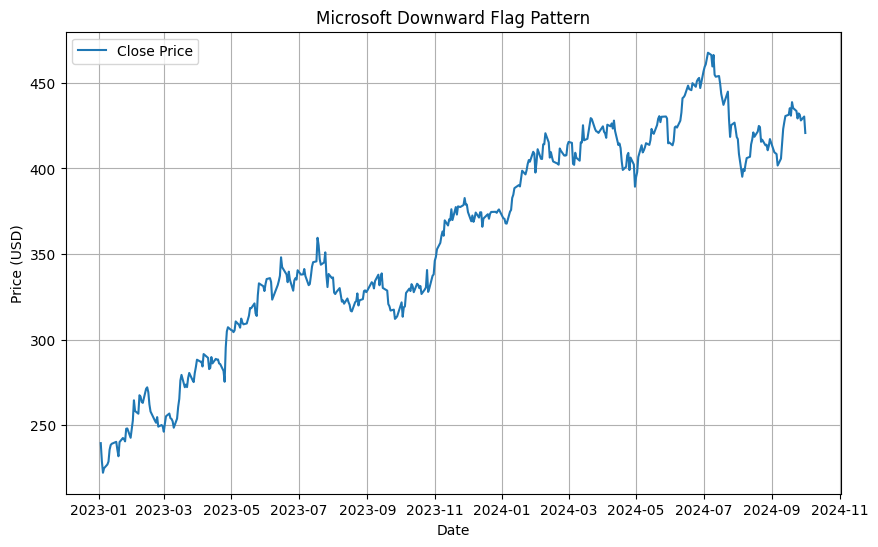

In [8]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current Microsoft Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

## Current Data Needs to be Annotated

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open   2. high  3. low  4. close    5. volume
date                                                        
2024-10-01  121.765  122.4351  115.79    117.00  302094485.0
2024-09-30  118.310  121.5000  118.15    121.44  227053651.0
2024-09-27  123.970  124.0300  119.26    121.40  271009175.0
2024-09-26  126.800  127.6650  121.80    124.04  302582868.0
2024-09-25  122.020  124.9400  121.61    123.51  284692948.0


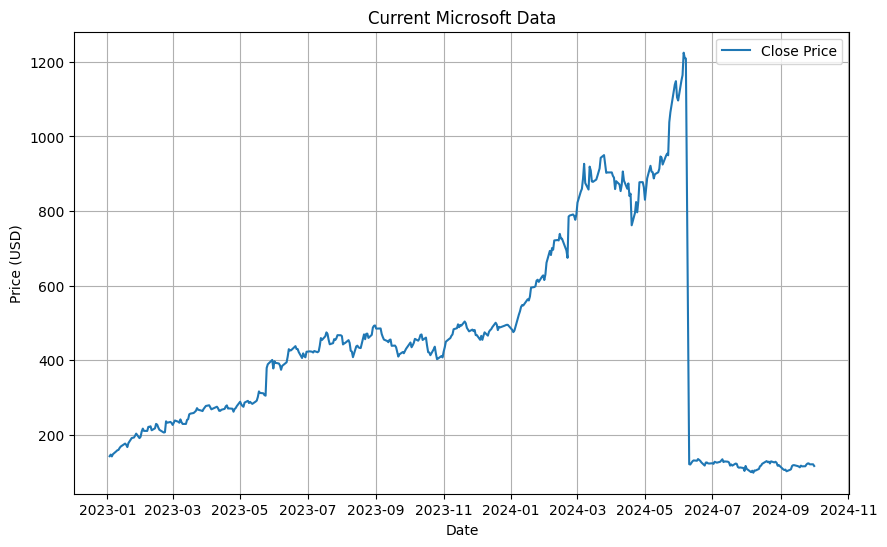

In [9]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='NVDA', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current NVDA Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high   3. low  4. close   5. volume
date                                                       
2024-10-01    37.21    37.56  36.0500     36.46  52858036.0
2024-09-30    36.58    37.32  36.1500     37.20  42223553.0
2024-09-27    36.91    37.47  36.5900     36.84  43219122.0
2024-09-26    37.26    37.44  36.6000     37.10  48601992.0
2024-09-25    36.89    37.18  36.3827     37.12  46511724.0


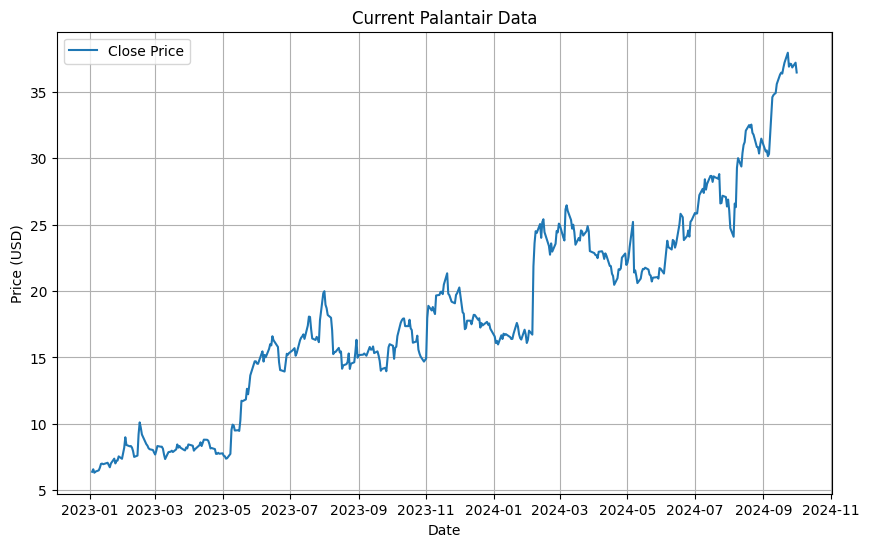

In [10]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='PLTR', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current Palantair Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2024-10-01   119.63  119.665  117.69    119.16  1618089.0
2024-09-30   121.45  122.450  118.21    119.83  1969725.0
2024-09-27   127.82  128.000  122.22    122.34  2053555.0
2024-09-26   124.00  129.970  123.56    126.65  3817485.0
2024-09-25   113.41  116.150  113.28    113.43  1972830.0


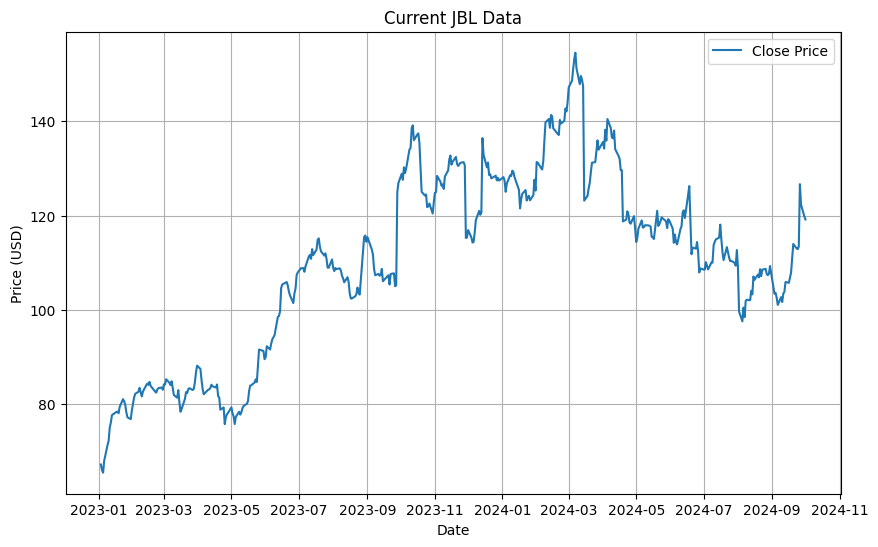

In [11]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='JBL', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current JBL Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open   2. high  3. low  4. close  5. volume
date                                                      
2024-10-01   341.60  341.7800  328.25    329.29  2702979.0
2024-09-30   335.17  343.4335  335.00    341.80  2570399.0
2024-09-27   338.87  339.9600  334.50    335.75  1759581.0
2024-09-26   343.55  344.2700  335.30    338.73  2527186.0
2024-09-25   343.43  345.0000  338.36    340.51  1788262.0


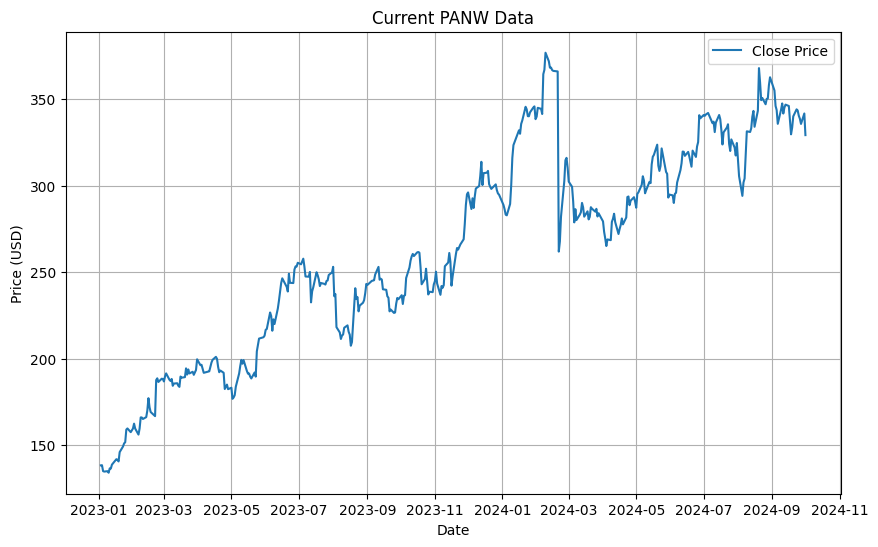

In [13]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='PANW', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current PANW Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open   2. high    3. low  4. close  5. volume
date                                                        
2024-10-01   282.26  282.9738  272.6701    275.15  3122617.0
2024-09-30   284.00  285.4100  278.2000    280.47  2857467.0
2024-09-27   283.80  286.4500  281.1500    285.86  2896384.0
2024-09-26   291.25  292.3750  277.8800    281.48  4532124.0
2024-09-25   290.00  291.7299  285.5400    286.47  2953459.0


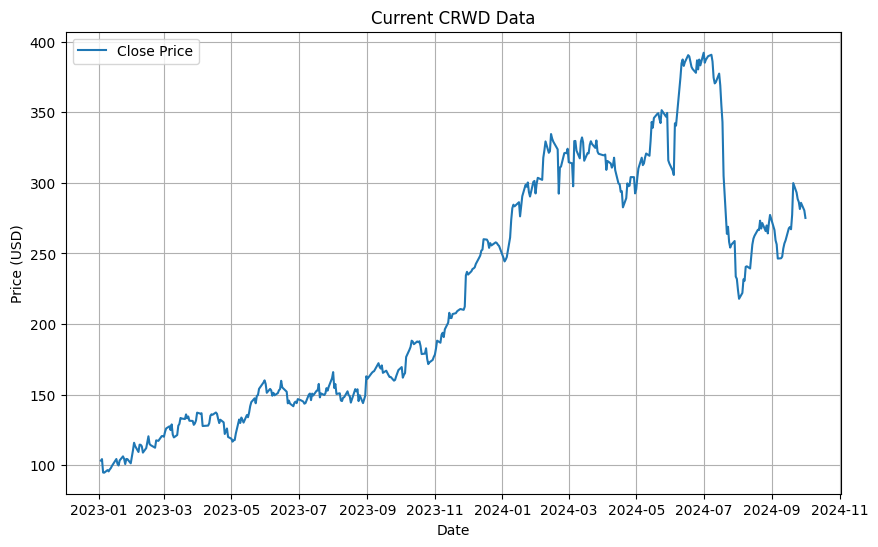

In [14]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='CRWD', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current CRWD Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2024-10-01   194.47   196.70  191.58    194.84   915528.0
2024-09-30   192.28   195.26  191.39    193.86  1095221.0
2024-09-27   191.71   197.26  191.40    194.25  1315275.0
2024-09-26   194.04   194.81  189.00    190.07  1466323.0
2024-09-25   192.65   194.68  191.08    191.91  1213024.0


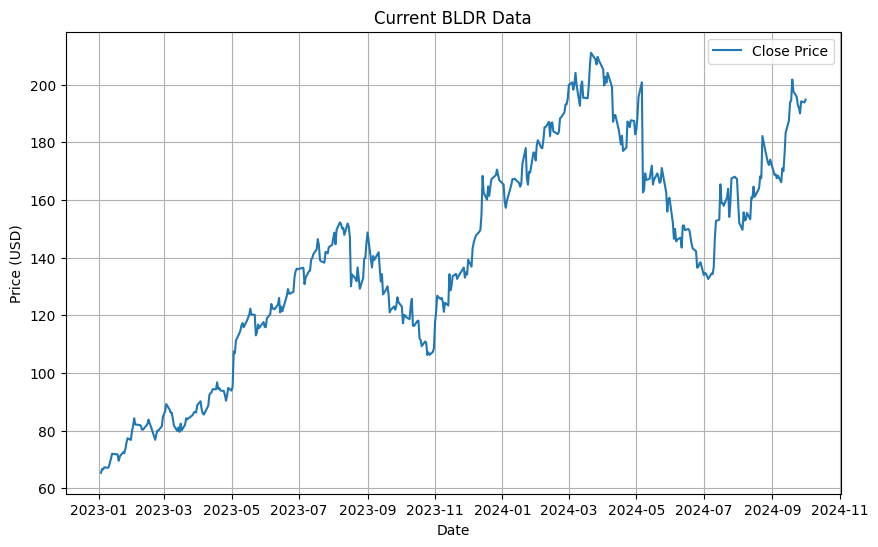

In [15]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='BLDR', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current BLDR Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high    3. low  4. close  5. volume
date                                                       
2024-10-01   177.56   178.20  170.8300    173.23  2045246.0
2024-09-30   178.21   179.35  171.5600    177.36  2357667.0
2024-09-27   182.74   182.82  177.4300    177.54  2389093.0
2024-09-26   180.00   184.41  179.2900    182.81  2150831.0
2024-09-25   178.89   179.14  176.2701    177.41  1582676.0


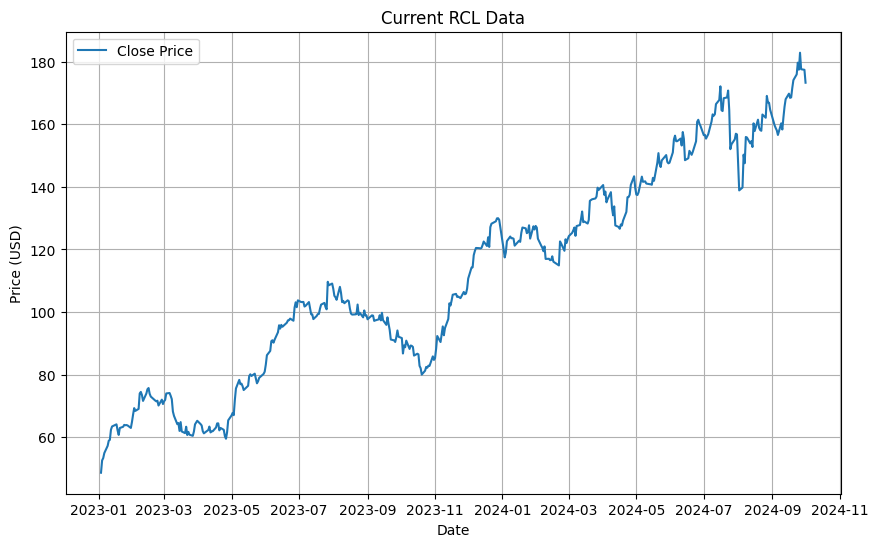

In [16]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='RCL', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current RCL Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open   2. high  3. low  4. close   5. volume
date                                                       
2024-10-01  164.480  165.4000  158.08    159.75  31831860.0
2024-09-30  163.100  165.0800  162.18    164.08  21920300.0
2024-09-27  167.480  168.7286  163.74    164.35  27876037.0
2024-09-26  167.055  168.6800  164.05    167.49  38044919.0
2024-09-25  158.500  162.9500  158.18    162.02  35233264.0


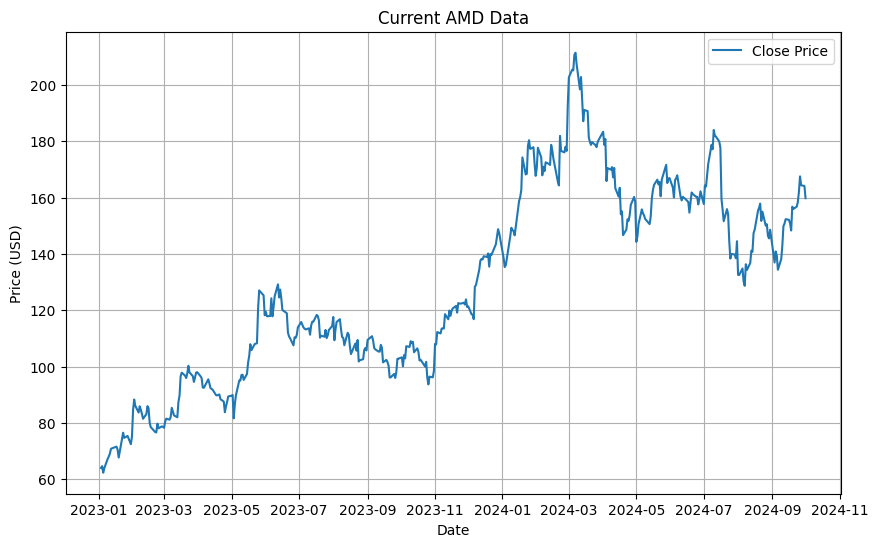

In [17]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='AMD', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current AMD Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open   2. high  3. low  4. close   5. volume
date                                                       
2024-10-01  117.390  117.7800  112.91    113.16   9641850.0
2024-09-30  119.000  119.9631  116.95    118.54   8647750.0
2024-09-27  124.000  124.4100  120.07    120.22  13544967.0
2024-09-26  122.375  127.0000  121.39    126.49  13420524.0
2024-09-25  117.270  120.2400  117.07    120.17   8534983.0


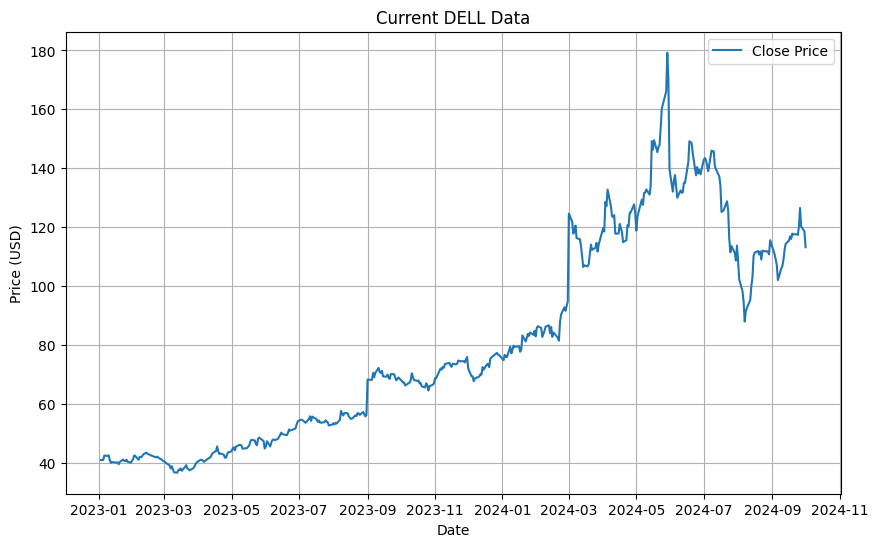

In [18]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='DELL', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current DELL Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high    3. low  4. close  5. volume
date                                                       
2024-10-01   187.49   188.22  184.9200    186.30  3794022.0
2024-09-30   185.08   188.71  183.0900    188.58  5629896.0
2024-09-27   184.17   186.19  183.1261    185.38  4452842.0
2024-09-26   189.40   189.55  184.5300    184.59  4781453.0
2024-09-25   189.83   190.88  188.1950    189.33  3214753.0


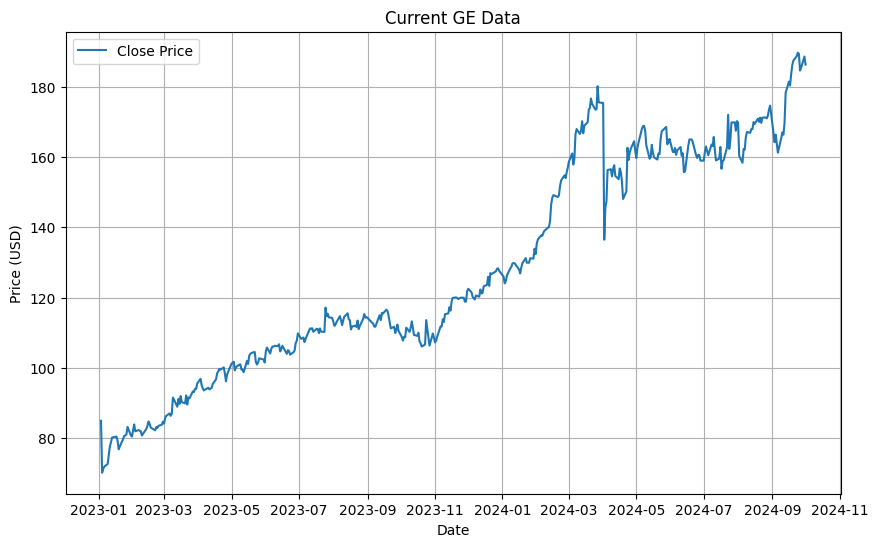

In [20]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='GE', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current GE Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open   2. high  3. low  4. close  5. volume
date                                                      
2024-10-01  888.830  891.2699  878.87    884.48  2455232.0
2024-09-30  864.520  887.4299  858.81    885.94  3246793.0
2024-09-27  893.620  901.2100  875.61    877.79  4377346.0
2024-09-26  920.255  921.8500  905.30    909.32  2692979.0
2024-09-25  931.790  939.3000  921.19    924.56  1805080.0


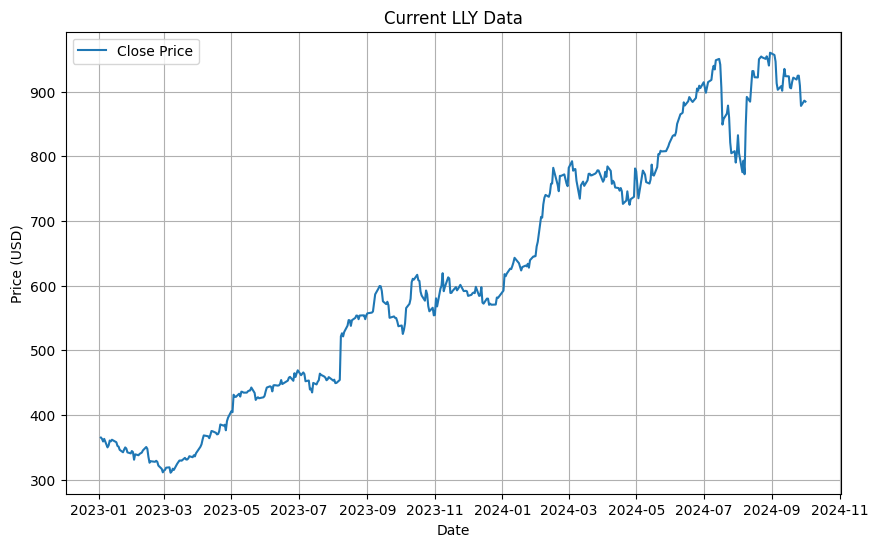

In [23]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='LLY', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current LLY Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2024-10-01   300.57  301.770  295.060    299.80   530743.0
2024-09-30   311.31  312.645  298.700    300.16   585103.0
2024-09-27   309.55  314.560  307.915    311.00   337374.0
2024-09-26   307.04  308.290  304.460    307.14   405555.0
2024-09-25   310.21  310.970  302.400    303.33   412047.0


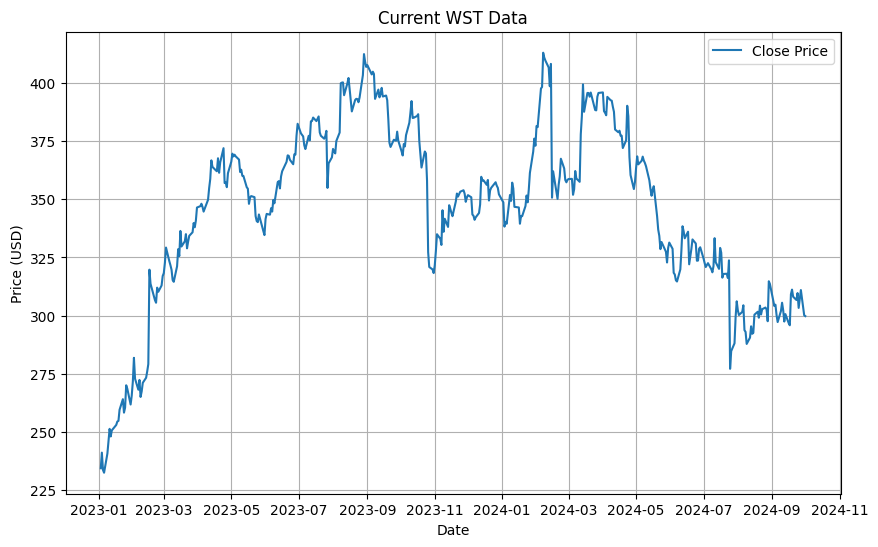

In [24]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='WST', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2023-01-01'
end_date = '2024-10-01'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
# data.to_csv('MSFT_downwardflag.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('Current WST Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()